In this note, before starting modelling and clustering, I will analyse the data distribution and characterics

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
films = pd.read_csv('films_NaNs_treated.csv')

In [6]:
films.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice
0,space-zombie-bingo,Space Zombie Bingo!,50.0,0.0,unknown,[],1970-01-01,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",0
1,the_green_grass,The Green Grass,0.0,0.0,unknown,[],1970-01-01,2020-02-11,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,0
2,love_lies,"Love, Lies",43.0,0.0,unknown,[],1970-01-01,1970-01-01,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",0
3,the_sore_losers_1997,Sore Losers,60.0,0.0,unknown,[],1970-01-01,2020-10-23,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,0
4,dinosaur_island_2002,Dinosaur Island,70.0,0.0,unknown,[],1970-01-01,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,0


Let's analyce the audience score. The audience score is calculated by dividing the number of people who gave the film a rating of 3.5 stars or higher by the total number of people who rated the film, and multiplying by 100. A film with an audience score of 90% means that 90% of the people who rated the film gave it 3.5 stars or higher. https://www.rottentomatoes.com/faq#:~:text=The%20Tomatometer%20score%20is%20calculated,Tomatometer%20and%20the%20Audience%20Score.

Excluding the non-value of 0

In [15]:
non_zero_scores_as = films['audienceScore'][films['audienceScore'] != 0]

In [16]:
non_zero_scores_as.describe()

count    72105.000000
mean        56.557520
std         23.717564
min          1.000000
25%         38.000000
50%         58.000000
75%         76.000000
max        100.000000
Name: audienceScore, dtype: float64

The mean is 57 which makes the score in the data non-inflationated as we can observed in other cases.

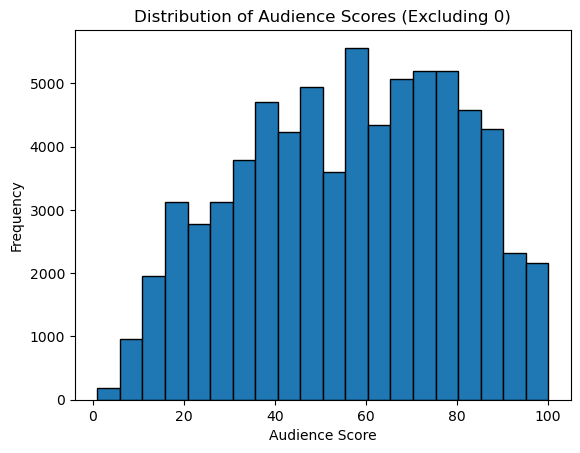

In [17]:
plt.hist(non_zero_scores_as, bins=20, edgecolor='black')
plt.xlabel('Audience Score')
plt.ylabel('Frequency')
plt.title('Distribution of Audience Scores (Excluding 0)')
plt.show()

Distribution of Audience score seems to be well distributed with a light unbalanced on the right

Now, let' analyse the distribution of the critique rating. The audience score is calculated by dividing the number of people who gave the film a rating of 3.5 stars or higher by the total number of people who rated the film, and multiplying by 100. A film with an audience score of 90% means that 90% of the people who rated the film gave it 3.5 stars or higher. https://www.rottentomatoes.com/faq#:~:text=The%20Tomatometer%20score%20is%20calculated,Tomatometer%20and%20the%20Audience%20Score.

In [20]:
non_zero_scores_tm = films['tomatoMeter'][films['tomatoMeter'] != 0]

In [21]:
non_zero_scores_tm.describe()

count    33171.000000
mean        67.170179
std         26.607980
min          1.000000
25%         48.000000
50%         74.000000
75%         89.000000
max        100.000000
Name: tomatoMeter, dtype: float64

Suprisingly the mean of the percentage of positive rating is higher for the critique than general users

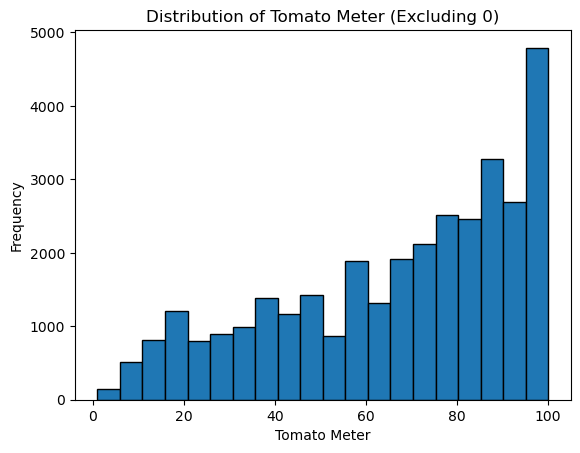

In [26]:
plt.hist(non_zero_scores_tm, bins=20, edgecolor='black')
plt.xlabel('Tomato Meter')
plt.ylabel('Frequency')
plt.title('Distribution of Tomato Meter (Excluding 0)')
plt.show()

The distribution here is more clearly imbalanced on the right side. In this case we have less data.

In [24]:
non_zero_scores_box_office = films['boxOffice'][films['boxOffice'] != 0]

In [25]:
non_zero_scores_box_office.describe()

count    1.474000e+04
mean     1.829888e+07
std      4.814704e+07
min      2.000000e+00
25%      5.150000e+04
50%      6.524500e+05
75%      1.410000e+07
max      8.584000e+08
Name: boxOffice, dtype: float64

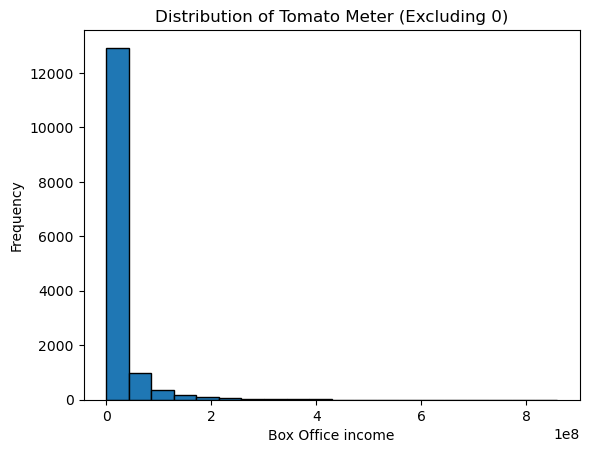

In [33]:
plt.hist(non_zero_scores_box_office, bins=20, edgecolor='black')
plt.xlabel('Box Office income')
plt.ylabel('Frequency')
plt.title('Distribution of Tomato Meter (Excluding 0)')
plt.show()

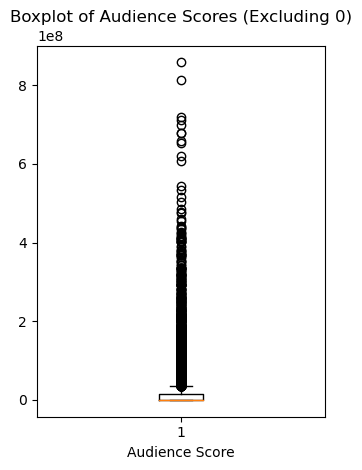

In [30]:
plt.subplot(1, 2, 2)
plt.boxplot(non_zero_scores_box_office)
plt.xlabel('Audience Score')
plt.title('Boxplot of Audience Scores (Excluding 0)')

plt.tight_layout()
plt.show()

Here, the ditribution is extremely imbalanced on the left. many films managed to gross a very low value while a small minority had outstanding results

In [34]:
top_20_films = films.nlargest(20, 'boxOffice')
top_20_titles = top_20_films['title']
print(top_20_titles)

106918                             Avengers: Endgame
141920                       Spider-Man: No Way Home
71018                              Top Gun: Maverick
18819                                Confess, Fletch
40663                                  Black Panther
104010                        Avengers: Infinity War
85064                       Avatar: The Way of Water
133735                                       Titanic
60549                                 Jurassic World
82548                       Star Wars: The Last Jedi
137815                                 Incredibles 2
121895                                 The Lion King
92981                   Rogue One: A Star Wars Story
5630                Star Wars: The Rise of Skywalker
109826                          Beauty and the Beast
107989                                  Finding Dory
88350                                      Frozen II
11537     Star Wars: Episode I -- The Phantom Menace
133715                       Avengers: Age of 